<center>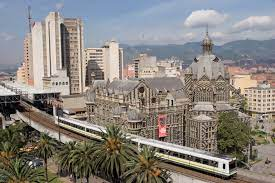</center>

# <div style="text-align:center"> Proyecto Capstone - La Batalla de los Vecindarios </div>

## Tabla de Contenido

1.  Introducción
2.  Problema Comercial
3.  Datos
4.  Proceso
5.  Metodología
6.  Resultados
7.  Conclusiones


# Introducción<a id="1"></a>

En este proyecto vamos a abordar cada uno de los barrios de la ciudad de Medellín - Colombia, con el fin de determinar en cual barrio es mejor establecer un negocio de Barber Shop.

Para llevar esto a cabo vamos a hacer uso de diferentes herramientas, una de ellas es la base de datos de barrios Veredas de la ciudad de Medellín, base de datos proporcionada por la alcaldía de Medellín, y la otra herramienta es la API de Foursqueare, la cual vamos a utilizar para analizar a detalle cada uno de los barrios, al realizar este análisis nos daremos cuenta de aquellos lugares cercanos y comunes a nuestra área de interés, en este caso, la ciudad de Medellín.

Cabe aclarar que nuestro caso de estudio es enfocado a una categoría de negocio en específico (Barber Shop), sin embargo, bajo esta misma metodología, el trabajo es aplicable a cualquier tipo de categorías de negocios.

Además, nuestro público objetivo en este caso en una persona en específico que está interesada en saber dónde establecer un negocio en la ciudad de Medellín; pero es aplicable a cualquier tipo de público emprendedor.

# Problema Comercial<a id="2"></a>

Este problema surge de la motivación de un familiar X por entablar un negocio de Barber Shop en la ciudad de Medellín, sin embargo, no sabe dónde es mejor, debido a la gran demanda que están presentando estos sitios actualmente.

Con base en lo anterior, utilizaremos Ciencia de Datos para generar Clústeres y así saber en cual barrio de Medellín es más factible entablar una Barberia y donde no.

Cabe aclarar una vez más, que con este proyecto le daremos solución a una necesidad puntual de una persona en específico, sin embargo, el presente proyecto es aplicable para cualquier persona emprendedora que quiere saber dónde puede ubicar su negocio, con base en que no haya mucha competencia y en que el sector tenga buena afluencia de personas.

# Datos<a id="3"></a>

Para este proyecto nos basamos en la fuente de datos **Bario Vereda** la cual la encontramos en la página web **Geo Medellín**, sitio web administrado por la Alcaldía de Medellín. En esta fuente de datos, encontraremos cada uno de los barrios de la ciudad de Medellín, juntos con otros atributos tales como tamaño del área, nombre de la comuna a la que pertenece, Id, entre otros. Posteriormente haremos limpieza de datos para dejar solo nuestros campos de interés.

Como segundo recurso utilizamos la librería **geopy** para encontrar los valores de latitud y longitud para cada uno de los barrios.

Una vez tengamos el DataFrame de los barrios de Medellín con sus respectivas coordenadas, procederemos a usar la API de Foursquare para analizar cada uno de los barrios.

Con nuestro DataFrame completo con el nombre del barrio y sus respectivas coordenadas, procedemos a conectarnos con Foursquare, el cual nos ayudará a analizar cuáles son las categorías de negocios más comunes en cada uno de los barrios de la ciudad de Medellín.

# Proceso<a id="4"></a>

**Importar librerías**

In [1]:
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # librería para manejar archivos JSON 

!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare


Libraries imported.


**Cargar DataSet**

In [128]:
#Cargar set de datos de la alcaldía de Medellín
df = pd.read_csv(r'C:\Users\sergio.carmona\Documents\Certificados Curso DataScience\Videos Curso DataScience\Curso 9. Capstone\Capstone_Final\Barrio_Vereda.csv')
df.head()

,OBJECTID,CODIGO,NOMBRE,SUBTIPO_BARRIOVEREDA,NOMBRE_COMUNA_CORREGIMIENTO,SHAPEAREA,SHAPELEN
0,1112,0510,Tricentenario,1,Castilla,420637.970349,2897.304229
1,1113,0208,Villa Niza,1,Santa Cruz,143215.327504,1697.303318
2,1114,1108,Laureles,1,Laureles Estadio,707014.821267,3847.112683
3,1115,1303,Santa Rosa de Lima,1,San Javier,139970.996369,2158.954261
4,1116,1206,Santa Lucía,1,La América,275913.740234,3048.703385


In [129]:
#Borrar columnas innecesarias
df = df.drop('OBJECTID',1).drop('SUBTIPO_BARRIOVEREDA',1).drop('NOMBRE_COMUNA_CORREGIMIENTO',1).drop('SHAPEAREA',1).drop('SHAPELEN',1)

In [130]:
df.head()

,CODIGO,NOMBRE
0,0510,Tricentenario
1,0208,Villa Niza
2,1108,Laureles
3,1303,Santa Rosa de Lima
4,1206,Santa Lucía


**Obtener valores de Latitud y Longitud**

In [132]:
# Traer valores de latitud y longitud para cada barrio de Medellín con ayuda de la librería Geopi
for i, row in df.iterrows():
    try:
        
        adress = row['NOMBRE']
        geolocator = Nominatim(user_agent='ny_explorer')
        location = geolocator.geocode(adress)
        latitude = location.latitude
        longitude = location.longitude
        df.loc[i, 0] = latitude
        df.loc[i, 1] = longitude
        #print('las coordenadas de {} son {}, {}'.format(adress, latitude, longitude) )
    except:
        print(adress)

df.rename(columns={0:'Latitude',1:'Longitude'}, inplace=True)

Buga Patio Bonito
Área de Expansión El Noral
Facultad Veterinaria y Zootecnia U.de.A.
Potrera Miserenga
Área de Expansión San Cristóbal
Área de Expansión Altavista
Área de Expansión Belén Rincón
Cabecera Urbana Corregimiento San Cristóbal
Área de Expansión Pajarito
Área de Expansión San Antonio de Prado
Facultad de Minas U. Nacional


**Limpiar DataSet**

In [133]:
#Borrar filas con campos nulos
df.dropna(inplace=True)
df.head()

,CODIGO,NOMBRE,Latitude,Longitude
0,0510,Tricentenario,6.291070,-75.566325
1,0208,Villa Niza,6.295645,-75.563450
2,1108,Laureles,-31.498759,-57.525990
3,1303,Santa Rosa de Lima,14.436619,-90.352043
4,1206,Santa Lucía,10.306021,-66.658849


In [134]:
#Mostrar tamaño del DataFrame
df.shape

(321, 4)

In [135]:
#Renombramos columna "NOMBRE" a "Neighborhood"
df.rename(columns={'NOMBRE':'Neighborhood'}, inplace=True)

**Utilice la librería geopy para obtener la latitud y la longitud de la Ciudad de Medellín**

In [136]:
#Obtenemos coordenadas solo para la ciudad de Medellín
address = 'Medellín'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Medellín are 6.2443382, -75.573553.


**Genere un mapa de Medellín con los barrios super puestos por encima**

In [137]:
# crear un mapa de Medellín utilizando los valores de latitud y longitud
map_medellin = folium.Map(location=[latitude, longitude], zoom_start=10)

# añadir marcadores al mapa
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_medellin)  
    
map_medellin

### Definir la versión y credenciales de FourSquare

In [138]:
CLIENT_ID = 'WKI0W2LBI2UMLVCXTZ3WA5JG13K0Z0UGCPKBZYS0RGCTNEA0' # su ID de Foursquare
CLIENT_SECRET = 'GS2FBGTB4Y4UILB43VDDVINRGZ1YM2VUMJ2MB0VX2WSDPSPZ' # Secreto de Foursquare
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WKI0W2LBI2UMLVCXTZ3WA5JG13K0Z0UGCPKBZYS0RGCTNEA0
CLIENT_SECRET:GS2FBGTB4Y4UILB43VDDVINRGZ1YM2VUMJ2MB0VX2WSDPSPZ


### Explorar el primer barrio del DataFrame

In [139]:
#Obtener el nombre
df.loc[0, 'Neighborhood']

'Tricentenario'

In [140]:
#Obtener coordenadas de nuestro primer barrio
neighborhood_latitude = df.loc[0, 'Latitude']
neighborhood_longitude = df.loc[0, 'Longitude']
neighborhood_name = df.loc[0, 'Neighborhood']

In [141]:
print("las coordenadas del barrio {}, son {}, {}".format(neighborhood_name,
                                                         neighborhood_latitude,
                                                         neighborhood_longitude
                                                        ))

las coordenadas del barrio Tricentenario, son 6.29107, -75.5663252


### Obtengamos los 100 sitios en Tricentenario en un radio de 500 metros

In [142]:
radius = 500
limit = 100
url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}".format(CLIENT_ID,
                                                                                                                        CLIENT_SECRET,
                                                                                                                        VERSION,
                                                                                                                        neighborhood_latitude,
                                                                                                                        neighborhood_longitude,
                                                                                                                        limit,
                                                                                                                        radius)
url

'https://api.foursquare.com/v2/venues/explore?client_id=WKI0W2LBI2UMLVCXTZ3WA5JG13K0Z0UGCPKBZYS0RGCTNEA0&client_secret=GS2FBGTB4Y4UILB43VDDVINRGZ1YM2VUMJ2MB0VX2WSDPSPZ&v=20180605&ll=6.29107,-75.5663252&limit=100&radius=500'

Enviar la solicitud GET

In [143]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60abe8aaa3bd6452de810ef2'},
 'response': {'headerLocation': 'Castilla',
  'headerFullLocation': 'Castilla, Medellín',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 6.2955700045000045,
    'lng': -75.5618063854314},
   'sw': {'lat': 6.286569995499996, 'lng': -75.57084401456859}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c7fce54807576b07006a915',
       'name': 'METRO - Estacion Tricentenario',
       'location': {'address': 'Carrera 63A',
        'crossStreet': 'Calle 97',
        'lat': 6.290542134273335,
        'lng': -75.56473297400169,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.290542134273335,
          'lng': -75.56473297400169}],
        '

Del laboratorio anterior de FourSquare sabemos que toda la información esta en la llave items. Antes de avanzar, usemos la función get_category_type del laboratorio anterios.

In [144]:
# función para extraer la categoria del sitio
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Ahora estamos listos para limpiar el objeto json y estructurarlo en un dataframe pandas.

In [145]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # objeto JSON

# filtrar columnas
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtrar la categoría para cada fila
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# limpiar columnas
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-145-1c6db9e35c87>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # objeto JSON


,name,categories,lat,lng
0,METRO - Estacion Tricentenario,Metro Station,6.290542,-75.564733
1,Parque Juanes de la Paz,Recreation Center,6.292663,-75.568673
2,Club De Tenis El Bosque,Tennis Court,6.293351,-75.568521
3,"Parche Tricen,Tienda mixta",Grocery Store,6.292670,-75.564551


### Explorar Barrios de Medellín

In [146]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [147]:
url

'https://api.foursquare.com/v2/venues/explore?client_id=WKI0W2LBI2UMLVCXTZ3WA5JG13K0Z0UGCPKBZYS0RGCTNEA0&client_secret=GS2FBGTB4Y4UILB43VDDVINRGZ1YM2VUMJ2MB0VX2WSDPSPZ&v=20180605&ll=6.29107,-75.5663252&limit=100&radius=500'

### Ahora escriba el código para ejecutar la función anterior en cada vecindario y crear un nuevo dataframe llamado medellin venues

In [148]:
medellin_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Tricentenario
Villa Niza
Laureles
Santa Rosa de Lima
Santa Lucía
La Floresta
Las Mercedes
Boston
Nueva Villa de La Iguaná
Alejandro Echavarría
Picacho
Moscú No.2
Santo Domingo Savio No.1
El Danubio
La Avanzada
Perpetuo Socorro
San Lucas
Media Luna
Barro Blanco
Piedra Gorda
San Pablo
Calasanz Parte Alta
Aguas Frías
Playón de Los Comuneros
El Chagualo
Cristo Rey
Los Conquistadores
Asomadera No.3
La Gloria
El Pesebre
Lalinde
Manrique Central No.1
Las Independencias
Parque Juan Pablo II
Moscú No.1
Bosques de San Pablo
Los Mangos
Los Cerros El Vergel
Miravalle
El Rodeo
La Milagrosa
El Castillo
San José La Cima No.1
El Raizal
Villa Guadalupe
El Poblado
Trinidad
El Pomar
Oriente
La Isla
La Sierra
María Cano-Carambolas
Belén
La Pilarica
El Corazón
Calle Nueva
La Frontera
Tejelo
Lorena
Plaza de Ferias
Miraflores
Los Ángeles
Alejandría
Metropolitano
La Francia
Cuarta Brigada
Las Acacias
Los Naranjos
Aures No.1
Cataluña
Sin Nombre
Carpinelo
Andalucía
La Castellana
Carlos E. Restrepo
Robledo
Juan 

In [149]:
# Revisemos el tamaño del dataframe resultante
print(medellin_venues.shape)
medellin_venues.head()

(3672, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tricentenario,6.291070,-75.566325,METRO - Estacion Tricentenario,6.290542,-75.564733,Metro Station
1,Tricentenario,6.291070,-75.566325,Parque Juanes de la Paz,6.292663,-75.568673,Recreation Center
2,Tricentenario,6.291070,-75.566325,Club De Tenis El Bosque,6.293351,-75.568521,Tennis Court
3,Tricentenario,6.291070,-75.566325,"Parche Tricen,Tienda mixta",6.292670,-75.564551,Grocery Store
4,Villa Niza,6.295645,-75.563450,Central Ganadera S.A.,6.296084,-75.565180,Farm


In [150]:
print('There are {} uniques categories.'.format(len(medellin_venues['Venue Category'].unique())))

There are 328 uniques categories.


In [151]:
#Escribir DataFrame
#medellin_venues.to_csv(r'C:\Users\sergio.carmona\Documents\Certificados Curso DataScience\Videos Curso DataScience\Curso 9. Capstone\Capstone_Final\Categorias.csv')

### Analizar cada barrio

In [152]:
# codificación
medellin_onehot = pd.get_dummies(medellin_venues[['Venue Category']])

# añadir la columna de barrio de regreso al dataframe
medellin_onehot['Neighborhood'] = medellin_venues['Neighborhood'] 

# mover la columna de barrio a la primer columna
fixed_columns = [medellin_onehot.columns[-1]] + list(medellin_onehot.columns[:-1])
medellin_onehot = medellin_onehot[fixed_columns]

medellin_onehot.head()

,Neighborhood,Venue Category_Accessories Store,Venue Category_Adult Boutique,Venue Category_Airport,Venue Category_American Restaurant,Venue Category_Amphitheater,Venue Category_Antique Shop,Venue Category_Arcade,Venue Category_Arepa Restaurant,Venue Category_Argentinian Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Baseball Stadium,Venue Category_Basketball Court,Venue Category_Basketball Stadium,Venue Category_Beach,Venue Category_Bed & Breakfast,Venue Category_Beer Bar,Venue Category_Beer Garden,Venue Category_Beer Store,Venue Category_Belgian Restaurant,Venue Category_Big Box Store,Venue Category_Bike Rental / Bike Share,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Botanical Garden,Venue Category_Boutique,Venue Category_Bowling Alley,Venue Category_Brazilian Restaurant,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Bridal Shop,Venue Category_Bridge,Venue Category_Bubble Tea Shop,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cable Car,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Camera Store,Venue Category_Campground,Venue Category_Candy Store,Venue Category_Cantonese Restaurant,Venue Category_Casino,Venue Category_Cave,Venue Category_Cemetery,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Church,Venue Category_Circus,Venue Category_City Hall,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_College Arts Building,Venue Category_College Bookstore,Venue Category_College Cafeteria,Venue Category_College Library,Venue Category_College Stadium,Venue Category_Colombian Restaurant,Venue Category_Comedy Club,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Credit Union,Venue Category_Creperie,Venue Category_Cuban Restaurant,Venue Category_Cultural Center,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Egyptian Restaurant,Venue Category_Electronics Store,Venue Category_Empanada Restaurant,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Fabric Shop,Venue Category_Factory,Venue Category_Falafel Restaurant,Venue Category_Farm,Venue Category_Farmers Market,Venue Category_Fast Food Restaurant,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Stand,Venue Category_Food Truck,Venue Category_Football Stadium,Venue Category_Fountain,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gas Station,Venue Category_Gastropub,Venue Category_Gay Bar,Venue Category_General Entertainment,Venue Category_German Restaurant,Venue Category_Gift Shop,Venue Category_Gluten-free Restaurant,Venue Category_Golf Course,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Gymnastics Gym,Ven

In [153]:
medellin_onehot.shape

(3672, 329)

Agrupemos las filas por barrios tomando la média de la frecuancia de la ocurrencia de cada categoría

In [154]:
medellin_grouped = medellin_onehot.groupby('Neighborhood').mean().reset_index()
medellin_grouped.head()

,Neighborhood,Venue Category_Accessories Store,Venue Category_Adult Boutique,Venue Category_Airport,Venue Category_American Restaurant,Venue Category_Amphitheater,Venue Category_Antique Shop,Venue Category_Arcade,Venue Category_Arepa Restaurant,Venue Category_Argentinian Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Baseball Stadium,Venue Category_Basketball Court,Venue Category_Basketball Stadium,Venue Category_Beach,Venue Category_Bed & Breakfast,Venue Category_Beer Bar,Venue Category_Beer Garden,Venue Category_Beer Store,Venue Category_Belgian Restaurant,Venue Category_Big Box Store,Venue Category_Bike Rental / Bike Share,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Botanical Garden,Venue Category_Boutique,Venue Category_Bowling Alley,Venue Category_Brazilian Restaurant,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Bridal Shop,Venue Category_Bridge,Venue Category_Bubble Tea Shop,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cable Car,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Camera Store,Venue Category_Campground,Venue Category_Candy Store,Venue Category_Cantonese Restaurant,Venue Category_Casino,Venue Category_Cave,Venue Category_Cemetery,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Church,Venue Category_Circus,Venue Category_City Hall,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_College Arts Building,Venue Category_College Bookstore,Venue Category_College Cafeteria,Venue Category_College Library,Venue Category_College Stadium,Venue Category_Colombian Restaurant,Venue Category_Comedy Club,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Credit Union,Venue Category_Creperie,Venue Category_Cuban Restaurant,Venue Category_Cultural Center,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Egyptian Restaurant,Venue Category_Electronics Store,Venue Category_Empanada Restaurant,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Fabric Shop,Venue Category_Factory,Venue Category_Falafel Restaurant,Venue Category_Farm,Venue Category_Farmers Market,Venue Category_Fast Food Restaurant,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Stand,Venue Category_Food Truck,Venue Category_Football Stadium,Venue Category_Fountain,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gas Station,Venue Category_Gastropub,Venue Category_Gay Bar,Venue Category_General Entertainment,Venue Category_German Restaurant,Venue Category_Gift Shop,Venue Category_Gluten-free Restaurant,Venue Category_Golf Course,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Gymnastics Gym,Ven

### Imprimir cada barrio junto con los 5 sitios mas comunes

In [155]:
num_top_venues = 5

for hood in medellin_grouped['Neighborhood']:
    print('----',hood,'----')
    temp = medellin_grouped[medellin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Aldea Pablo VI ----
                                          venue  freq
0                     Venue Category_Restaurant  0.33
1        Venue Category_Health & Beauty Service  0.33
2     Venue Category_Construction & Landscaping  0.33
3              Venue Category_Accessories Store  0.00
4  Venue Category_Paper / Office Supplies Store  0.00


---- Alejandro Echavarría ----
                                 venue  freq
0        Venue Category_Ice Cream Shop  0.17
1  Venue Category_Fast Food Restaurant  0.17
2            Venue Category_Restaurant  0.17
3          Venue Category_Tram Station  0.17
4         Venue Category_Big Box Store  0.17


---- Alejandría ----
                      venue  freq
0       Venue Category_Café  0.26
1      Venue Category_Hotel  0.14
2      Venue Category_Plaza  0.06
3  Venue Category_Hotel Bar  0.06
4        Venue Category_Bar  0.06


---- Alfonso López ----
                             venue  freq
0         Venue Category_Gastropub  0.17
1            

### Pongamos eso en el dataframe

Primero escribamos una función para ordenar los sitios en orden descendente.

In [156]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Generemos el nuevo dataframe y mostremos los primeros 10 sitios de cada barrio.

In [157]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = medellin_grouped['Neighborhood']

for ind in np.arange(medellin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(medellin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldea Pablo VI,Venue Category_Restaurant,Venue Category_Construction & Landscaping,Venue Category_Health & Beauty Service,Venue Category_Zoo,Venue Category_Fondue Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market
1,Alejandro Echavarría,Venue Category_Fast Food Restaurant,Venue Category_Big Box Store,Venue Category_Shopping Mall,Venue Category_Restaurant,Venue Category_Ice Cream Shop,Venue Category_Tram Station,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market
2,Alejandría,Venue Category_Café,Venue Category_Hotel,Venue Category_Coffee Shop,Venue Category_Bar,Venue Category_Plaza,Venue Category_Hotel Bar,Venue Category_Furniture / Home Store,Venue Category_Asian Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Sandwich Place
3,Alfonso López,Venue Category_Department Store,Venue Category_Bus Station,Venue Category_Gastropub,Venue Category_Latin American Restaurant,Venue Category_Bakery,Venue Category_Pizza Place,Venue Category_Zoo,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Floating Market
4,Altamira,Venue Category_History Museum,Venue Category_Cave,Venue Category_Fast Food Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food


In [158]:
medellin_grouped_clustering = medellin_grouped.drop('Neighborhood', 1)

### Barrios Agrupados

Ejecutemos k-means para agrupar los barrios en 5 agrupaciones.

In [159]:
# establecer el número de agrupaciones
kclusters = 5

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(medellin_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio.

In [160]:
# añadir etiquetas
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [161]:
medellin_merged = df

# juntar manhattan_grouped con manhattan_data 
medellin_merged = medellin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

medellin_merged.head() # revisar las ultimas columnas

,CODIGO,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0510,Tricentenario,6.291070,-75.566325,0.0,Venue Category_Recreation Center,Venue Category_Metro Station,Venue Category_Tennis Court,Venue Category_Grocery Store,Venue Category_Fondue Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop
1,0208,Villa Niza,6.295645,-75.563450,0.0,Venue Category_Real Estate Office,Venue Category_Grocery Store,Venue Category_Farm,Venue Category_Bakery,Venue Category_Health & Beauty Service,Venue Category_Football Stadium,Venue Category_Floating Market,Venue Category_Fried Chicken Joint,Venue Category_Filipino Restaurant,Venue Category_French Restaurant
2,1108,Laureles,-31.498759,-57.525990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1303,Santa Rosa de Lima,14.436619,-90.352043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1206,Santa Lucía,10.306021,-66.658849,0.0,Venue Category_Plaza,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant


In [165]:
#Convertir "Cluster labels" a int
medellin_merged['Cluster Labels'] = medellin_merged['Cluster Labels'].astype('int')

### Finalmente visualizar agrupaciones resultantes

In [167]:
# crear mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(medellin_merged['Latitude'], medellin_merged['Longitude'], medellin_merged['Neighborhood'], medellin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Sitios donde es mas común Barber shop

In [169]:
#Barber shop es común en el barrio la castellana y en el Nogal
medellin_venues[medellin_venues['Venue Category'] =='Salon / Barbershop']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
699,La Castellana,40.433324,-3.684132,Aveda Lifestyle Salon & Spa,40.430264,-3.682527,Salon / Barbershop
2475,El Nogal-Los Almendros,6.237403,-75.597307,Los Clásicos Barbershop,6.240638,-75.597294,Salon / Barbershop


### Analizando Cluster de La Castellana

In [170]:
#Hacemos zoom al barrio la castellana
medellin_merged[medellin_merged['Neighborhood']=='La Castellana']

,CODIGO,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
73,1110,La Castellana,40.433324,-3.684132,0,Venue Category_Spanish Restaurant,Venue Category_Restaurant,Venue Category_Boutique,Venue Category_Coffee Shop,Venue Category_Tapas Restaurant,Venue Category_Hotel,Venue Category_Mediterranean Restaurant,Venue Category_Shoe Store,Venue Category_Spa,Venue Category_Furniture / Home Store


### Analizando Cluster de El Nogal-Los Almendros

In [171]:
#Hacemos zoom al barrio el Nogal
medellin_merged[medellin_merged['Neighborhood']=='El Nogal-Los Almendros']

,CODIGO,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
202,1620,El Nogal-Los Almendros,6.237403,-75.597307,0,Venue Category_Bar,Venue Category_Gym,Venue Category_Fried Chicken Joint,Venue Category_Market,Venue Category_Steakhouse,Venue Category_Pet Café,Venue Category_Bakery,Venue Category_Salon / Barbershop,Venue Category_Beer Garden,Venue Category_Food Stand


# Metodología<a id="5"></a>

Se recurrió a la base de datos de barrios de Medellín proporcionada en la página web de Geo Medellín de la Alcaldía, la cual contiene todos los barrios de Medellín con sus respectivos atributos como Nombre, Id, área, comuna a la que pertenece, entre otros.

Posteriormente se realizó limpieza de la data, dejando solo aquellos campos de interés.

Luego se hizo uso de la librería **Geopy** para agregar al DataFrame los valores de latitud y longitud de cada barrio; gracias a esto tenemos nuestro input completo para interactuar con la API de Foursqueare, la cual nos permite hacer un análisis profundo de cada uno de los barrios. al conectarnos con la API podemos conocer cuáles son los sitios o las categorías de negocios más comunes en cada uno de los barrios.

Una vez con los datos necesarios, procedemos a construir la url de consulta a la API de Foursquare, y con la respuesta que nos da la API, realizamos el análisis de todos los barrios de Medellín, arrojando como resultado las 10 categorías de lugares más comunes en cada uno de los barrios de Medellín.

Por último se realiza modelo de clustering con algoritmo K-Means, agrupando todo el set de datos en 5 clústeres.

# Resultados<a id="6"></a>

# Analizar agrupaciones

In [172]:
# Agrupacion 1
medellin_merged.loc[medellin_merged['Cluster Labels'] == 0, medellin_merged.columns[[1] + list(range(5, medellin_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tricentenario,Venue Category_Recreation Center,Venue Category_Metro Station,Venue Category_Tennis Court,Venue Category_Grocery Store,Venue Category_Fondue Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop
1,Villa Niza,Venue Category_Real Estate Office,Venue Category_Grocery Store,Venue Category_Farm,Venue Category_Bakery,Venue Category_Health & Beauty Service,Venue Category_Football Stadium,Venue Category_Floating Market,Venue Category_Fried Chicken Joint,Venue Category_Filipino Restaurant,Venue Category_French Restaurant
4,Santa Lucía,Venue Category_Plaza,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant
5,La Floresta,Venue Category_Restaurant,Venue Category_Train Station,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop
6,Las Mercedes,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Grocery Store,Venue Category_Sandwich Place,Venue Category_Beer Garden,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant
7,Boston,Venue Category_Italian Restaurant,Venue Category_Historic Site,Venue Category_Coffee Shop,Venue Category_Hotel,Venue Category_Seafood Restaurant,Venue Category_Bakery,Venue Category_Pub,Venue Category_Sandwich Place,Venue Category_Restaurant,Venue Category_Park
8,Nueva Villa de La Iguaná,Venue Category_Seafood Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Gym,Venue Category_Cocktail Bar,Venue Category_Soccer Stadium,Venue Category_Shopping Mall,Venue Category_Latin American Restaurant,Venue Category_Housing Development,Venue Category_Hotel,Venue Category_BBQ Joint
9,Alejandro Echavarría,Venue Category_Fast Food Restaurant,Venue Category_Big Box Store,Venue Category_Shopping Mall,Venue Category_Restaurant,Venue Category_Ice Cream Shop,Venue Category_Tram Station,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market
11,Moscú No.2,Venue Category_Print Shop,Venue Category_Gym,Venue Category_Construction & Landscaping,Venue Category_Park,Venue Category_Zoo,Venue Category_Food,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market
13,El Danubio,Venue Category_Italian Restaurant,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Harbor / Marina,Venue Category_Zoo,Venue Category_Food & Drink Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop


In [173]:
# Agrupacion 2
medellin_merged.loc[medellin_merged['Cluster Labels'] == 1, medellin_merged.columns[[1] + list(range(5, medellin_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Picacho,Venue Category_Trail,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant
141,La Florida,Venue Category_Trail,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant
171,La Florida,Venue Category_Trail,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant
307,El Picacho,Venue Category_Trail,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant


In [174]:
# Agrupacion 3
medellin_merged.loc[medellin_merged['Cluster Labels'] == 2, medellin_merged.columns[[1] + list(range(5, medellin_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,Villa Turbay,Venue Category_Campground,Venue Category_Cable Car,Venue Category_Zoo,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food,Venue Category_Food & Drink Shop
162,Villa Lilliam,Venue Category_Campground,Venue Category_Zoo,Venue Category_Filipino Restaurant,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food,Venue Category_Food & Drink Shop
281,Santa Elena Sector Central,Venue Category_Campground,Venue Category_Resort,Venue Category_Zoo,Venue Category_Food,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop


In [175]:
# Agrupacion 4
medellin_merged.loc[medellin_merged['Cluster Labels'] == 3, medellin_merged.columns[[1] + list(range(5, medellin_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
138,El Cerro,Venue Category_Other Great Outdoors,Venue Category_Zoo,Venue Category_Food & Drink Shop,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food
317,Versalles No.2,Venue Category_Other Great Outdoors,Venue Category_Zoo,Venue Category_Food & Drink Shop,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food


In [176]:
# Agrupacion 5
medellin_merged.loc[medellin_merged['Cluster Labels'] == 4, medellin_merged.columns[[1] + list(range(5, medellin_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Santo Domingo Savio No.1,Venue Category_Bar,Venue Category_Cable Car,Venue Category_South American Restaurant,Venue Category_Food & Drink Shop,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant
118,Granizal,Venue Category_Bar,Venue Category_Cable Car,Venue Category_South American Restaurant,Venue Category_Food & Drink Shop,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant
240,Picachito,Venue Category_Bar,Venue Category_Scenic Lookout,Venue Category_Zoo,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop
258,Oleoducto,Venue Category_Bar,Venue Category_Snack Place,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food
265,Kennedy,Venue Category_Bar,Venue Category_Post Office,Venue Category_Food & Drink Shop,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant
308,La Cuchilla,Venue Category_Bar,Venue Category_Fast Food Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Floating Market,Venue Category_Flower Shop,Venue Category_Fondue Restaurant,Venue Category_Food,Venue Category_Food & Drink Shop


# Conclusiones<a id="7"></a>

Según los resultados arrojados por el modelo, podemos concluir que los únicos barrios de Medellín donde la categoría **Barber Shop** (nuestra categoría de interés) entra como una de las 10 categorías más populares, son en el sector de **La Castellana** y en **El Nogal-Los Almendros**; es decir, estos 2 sitios no serían sitios óptimos para entablar nuestro negocio Barber Shop.

Uno de los sitios más destacados para establecer una nueva barbería podría ser el sector de **Tricentenario**, ya que está ubicado cerca al Metro de Medellín (sector muy transcurrido) y es el barrio que posee mayor cantidad de categorías de lugares diferentes, calificándolo como un sector altamente comercial, además que posee diversos sitios de recreación, según nuestro modelo de clustering, Tricentenario queda en el top de los barrios más comunes y concurridos y hace parte de nuestro Clúster 0, el cual contiene mayor comercialización y concurrencia.
